In [ ]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# Реализуйте удаление периодического шума

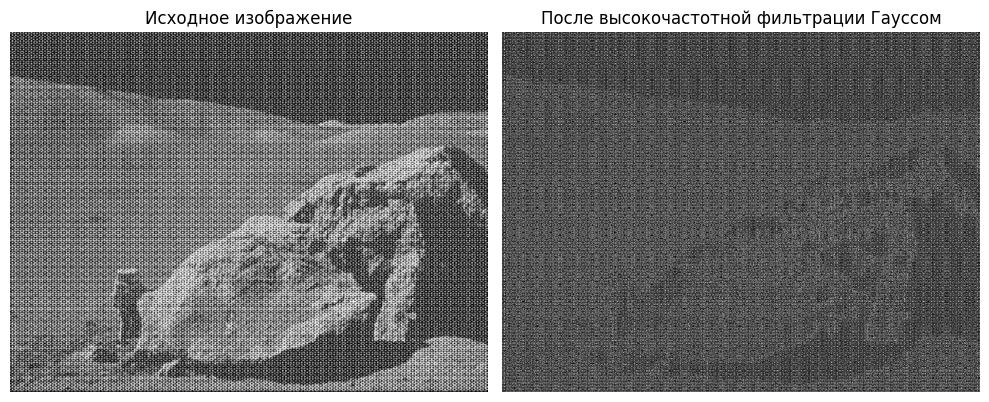

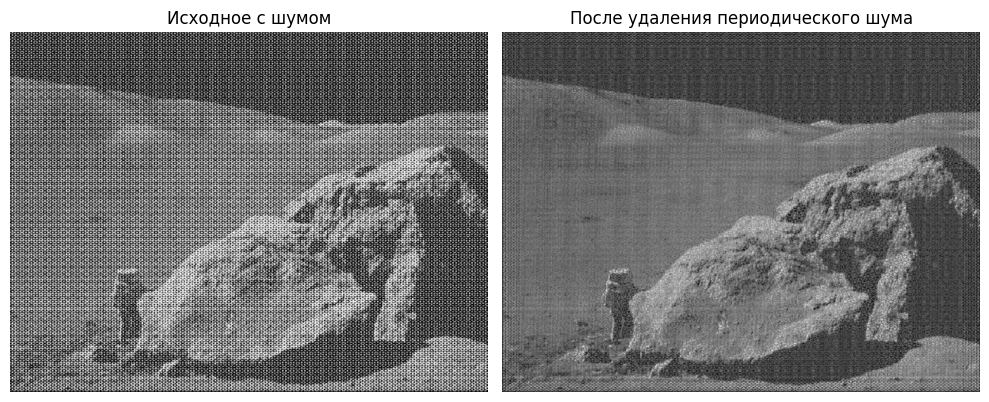

In [26]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max

image = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)  
dft_shift = np.fft.fftshift(dft)  

sigma = 30
rows, cols = image.shape
x, y = np.meshgrid(np.arange(0, cols, 1), np.arange(0, rows, 1))

gauss_mask = np.exp(-((x - (cols // 2))**2 + (y - (rows // 2))**2) / (2 * sigma**2))
mask_res = 1 - gauss_mask

dft_shift_filtered = dft_shift * mask_res[:, :, np.newaxis]

f_ishift = np.fft.ifftshift(dft_shift_filtered)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_back, cmap='gray')
plt.title('После высокочастотной фильтрации Гауссом')
plt.axis('off')

plt.tight_layout()
plt.show()

dft2 = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift2 = np.fft.fftshift(dft2)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift2[:,:,0], dft_shift2[:,:,1]) + 1)

local_maxima = peak_local_max(magnitude_spectrum, min_distance=20, threshold_abs=180)

mask = np.ones((rows, cols, 2), dtype=np.uint8)
center_x, center_y = rows//2, cols//2

for peak in local_maxima:
    y, x = peak
    distance = np.sqrt((x - center_y)**2 + (y - center_x)**2)
    if distance > 40:  
        cv.circle(mask, (x, y), 5, (0, 0), -1)

dft_shift_filtered2 = dft_shift2 * mask
f_ishift2 = np.fft.ifftshift(dft_shift_filtered2)
image_idft = cv.idft(f_ishift2)
image_idft = cv.magnitude(image_idft[:,:,0], image_idft[:,:,1])

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Исходное с шумом')
plt.axis('off')

plt.subplot(122)
plt.imshow(image_idft, cmap='gray')
plt.title('После удаления периодического шума')
plt.axis('off')

plt.tight_layout()
plt.show()
